In [6]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

cid = '58e801c913f24fe7b0a658c363f4a1fa'
secret = '94c354ca1a45410d9e56f00f4707ecd9'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret = secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)  


In [7]:
# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0, 10000, 50):
    track_results = sp.search(q = 'year:2018', type = 'track', limit = 50, offset = i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)


Time to run this code (in seconds): 252.7406712640004


In [8]:
#Checker for your list
print('number of elements in the track_id list:', len(track_id))

number of elements in the track_id list: 10000


In [9]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name, 'track_name':track_name, 'track_id':track_id, 'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()



(10000, 4)


,artist_name,track_name,track_id,popularity
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97
1,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,97
2,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),1wJRveJZLSb1rjhnUHQiv6,93
3,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,93
4,YNW Melly,Murder On My Mind,7eBqSVxrzQZtK2mmgRG6lC,93


In [10]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
artist_name    10000 non-null object
track_name     10000 non-null object
track_id       10000 non-null object
popularity     10000 non-null int64
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [11]:
#Get unique count of track songs
df_tracks['track_name'].nunique()

7118

In [12]:
#Group the entries by artist_name and track_name and check for duplicates
grouped = df_tracks.groupby(['artist_name', 'track_name'], as_index = True).size()
grouped[grouped > 1].count()



2070

In [13]:
df_tracks.drop_duplicates(subset = ['artist_name', 'track_name'], inplace = True)

In [14]:
#Doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name', 'track_name'], as_index = True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()

0

In [15]:
#Another checker for remaining duplicate values
df_tracks[df_tracks.duplicated(subset = ['artist_name', 'track_name'], keep = False)].count()

artist_name    0
track_name     0
track_id       0
popularity     0
dtype: int64

In [16]:
df_tracks.shape

(7321, 4)

In [17]:
#Appending Audio Features Data
start = timeit.default_timer()

#empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0, len(df_tracks['track_id']), batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
    
print('Number of tracks where no audio features were available:', None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Number of tracks where no audio features were available: 1
Time to run this code (in seconds): 43.33400711200011


In [18]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 7320


In [19]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (7320, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.5560,https://api.spotify.com/v1/audio-analysis/3KkX...,0.760,158040,0.479,3KkXRkHbMCARz0aVfEt68P,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,https://api.spotify.com/v1/tracks/3KkXRkHbMCAR...,audio_features,spotify:track:3KkXRkHbMCARz0aVfEt68P,0.913
1,0.1630,https://api.spotify.com/v1/audio-analysis/6MWt...,0.833,149520,0.539,6MWtB6iiXyIwun0YzU6DFP,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,https://api.spotify.com/v1/tracks/6MWtB6iiXyIw...,audio_features,spotify:track:6MWtB6iiXyIwun0YzU6DFP,0.385
2,0.0153,https://api.spotify.com/v1/audio-analysis/1wJR...,0.581,189487,0.662,1wJRveJZLSb1rjhnUHQiv6,0.000000,9,0.1110,-5.239,1,0.3030,93.023,4,https://api.spotify.com/v1/tracks/1wJRveJZLSb1...,audio_features,spotify:track:1wJRveJZLSb1rjhnUHQiv6,0.434
3,0.2590,https://api.spotify.com/v1/audio-analysis/2IRZ...,0.889,180522,0.496,2IRZnDFmlqMuOrYOLnZZyc,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,https://api.spotify.com/v1/tracks/2IRZnDFmlqMu...,audio_features,spotify:track:2IRZnDFmlqMuOrYOLnZZyc,0.544
4,0.1450,https://api.spotify.com/v1/audio-analysis/7eBq...,0.759,268434,0.730,7eBqSVxrzQZtK2mmgRG6lC,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,https://api.spotify.com/v1/tracks/7eBqSVxrzQZt...,audio_features,spotify:track:7eBqSVxrzQZtK2mmgRG6lC,0.740


In [20]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 18 columns):
acousticness        7320 non-null float64
analysis_url        7320 non-null object
danceability        7320 non-null float64
duration_ms         7320 non-null int64
energy              7320 non-null float64
id                  7320 non-null object
instrumentalness    7320 non-null float64
key                 7320 non-null int64
liveness            7320 non-null float64
loudness            7320 non-null float64
mode                7320 non-null int64
speechiness         7320 non-null float64
tempo               7320 non-null float64
time_signature      7320 non-null int64
track_href          7320 non-null object
type                7320 non-null object
uri                 7320 non-null object
valence             7320 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 1.0+ MB


In [21]:
columns_to_drop = ['analysis_url', 'track_href', 'type', 'uri']
df_audio_features.drop(columns_to_drop, axis = 1, inplace = True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace = True)

df_audio_features.shape

(7320, 14)

In [22]:
#merge both dataframes
#inner method will make sure that we only keep track IDs present in both datasets

df = pd.merge(df_tracks, df_audio_features, on = 'track_id', how = 'inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (7320, 14)


,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.5560,0.760,158040,0.479,0.000000,2,0.0703,-5.574,1,0.0466,89.911,4,0.913
1,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,97,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385
2,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),1wJRveJZLSb1rjhnUHQiv6,93,0.0153,0.581,189487,0.662,0.000000,9,0.1110,-5.239,1,0.3030,93.023,4,0.434
3,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,93,0.2590,0.889,180522,0.496,0.000000,4,0.2520,-6.365,0,0.0905,86.003,4,0.544
4,YNW Melly,Murder On My Mind,7eBqSVxrzQZtK2mmgRG6lC,93,0.1450,0.759,268434,0.730,0.000003,0,0.1100,-7.985,0,0.0516,115.007,4,0.740


In [28]:
#Save the dataframe as a .csv file
df.to_csv('SpotifyAudioFeatures4172019.csv')

In [27]:
#What is the strongest indicator to popularity?
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Data Visualisation libraries
import seaborn as sns
%matplotlib inline

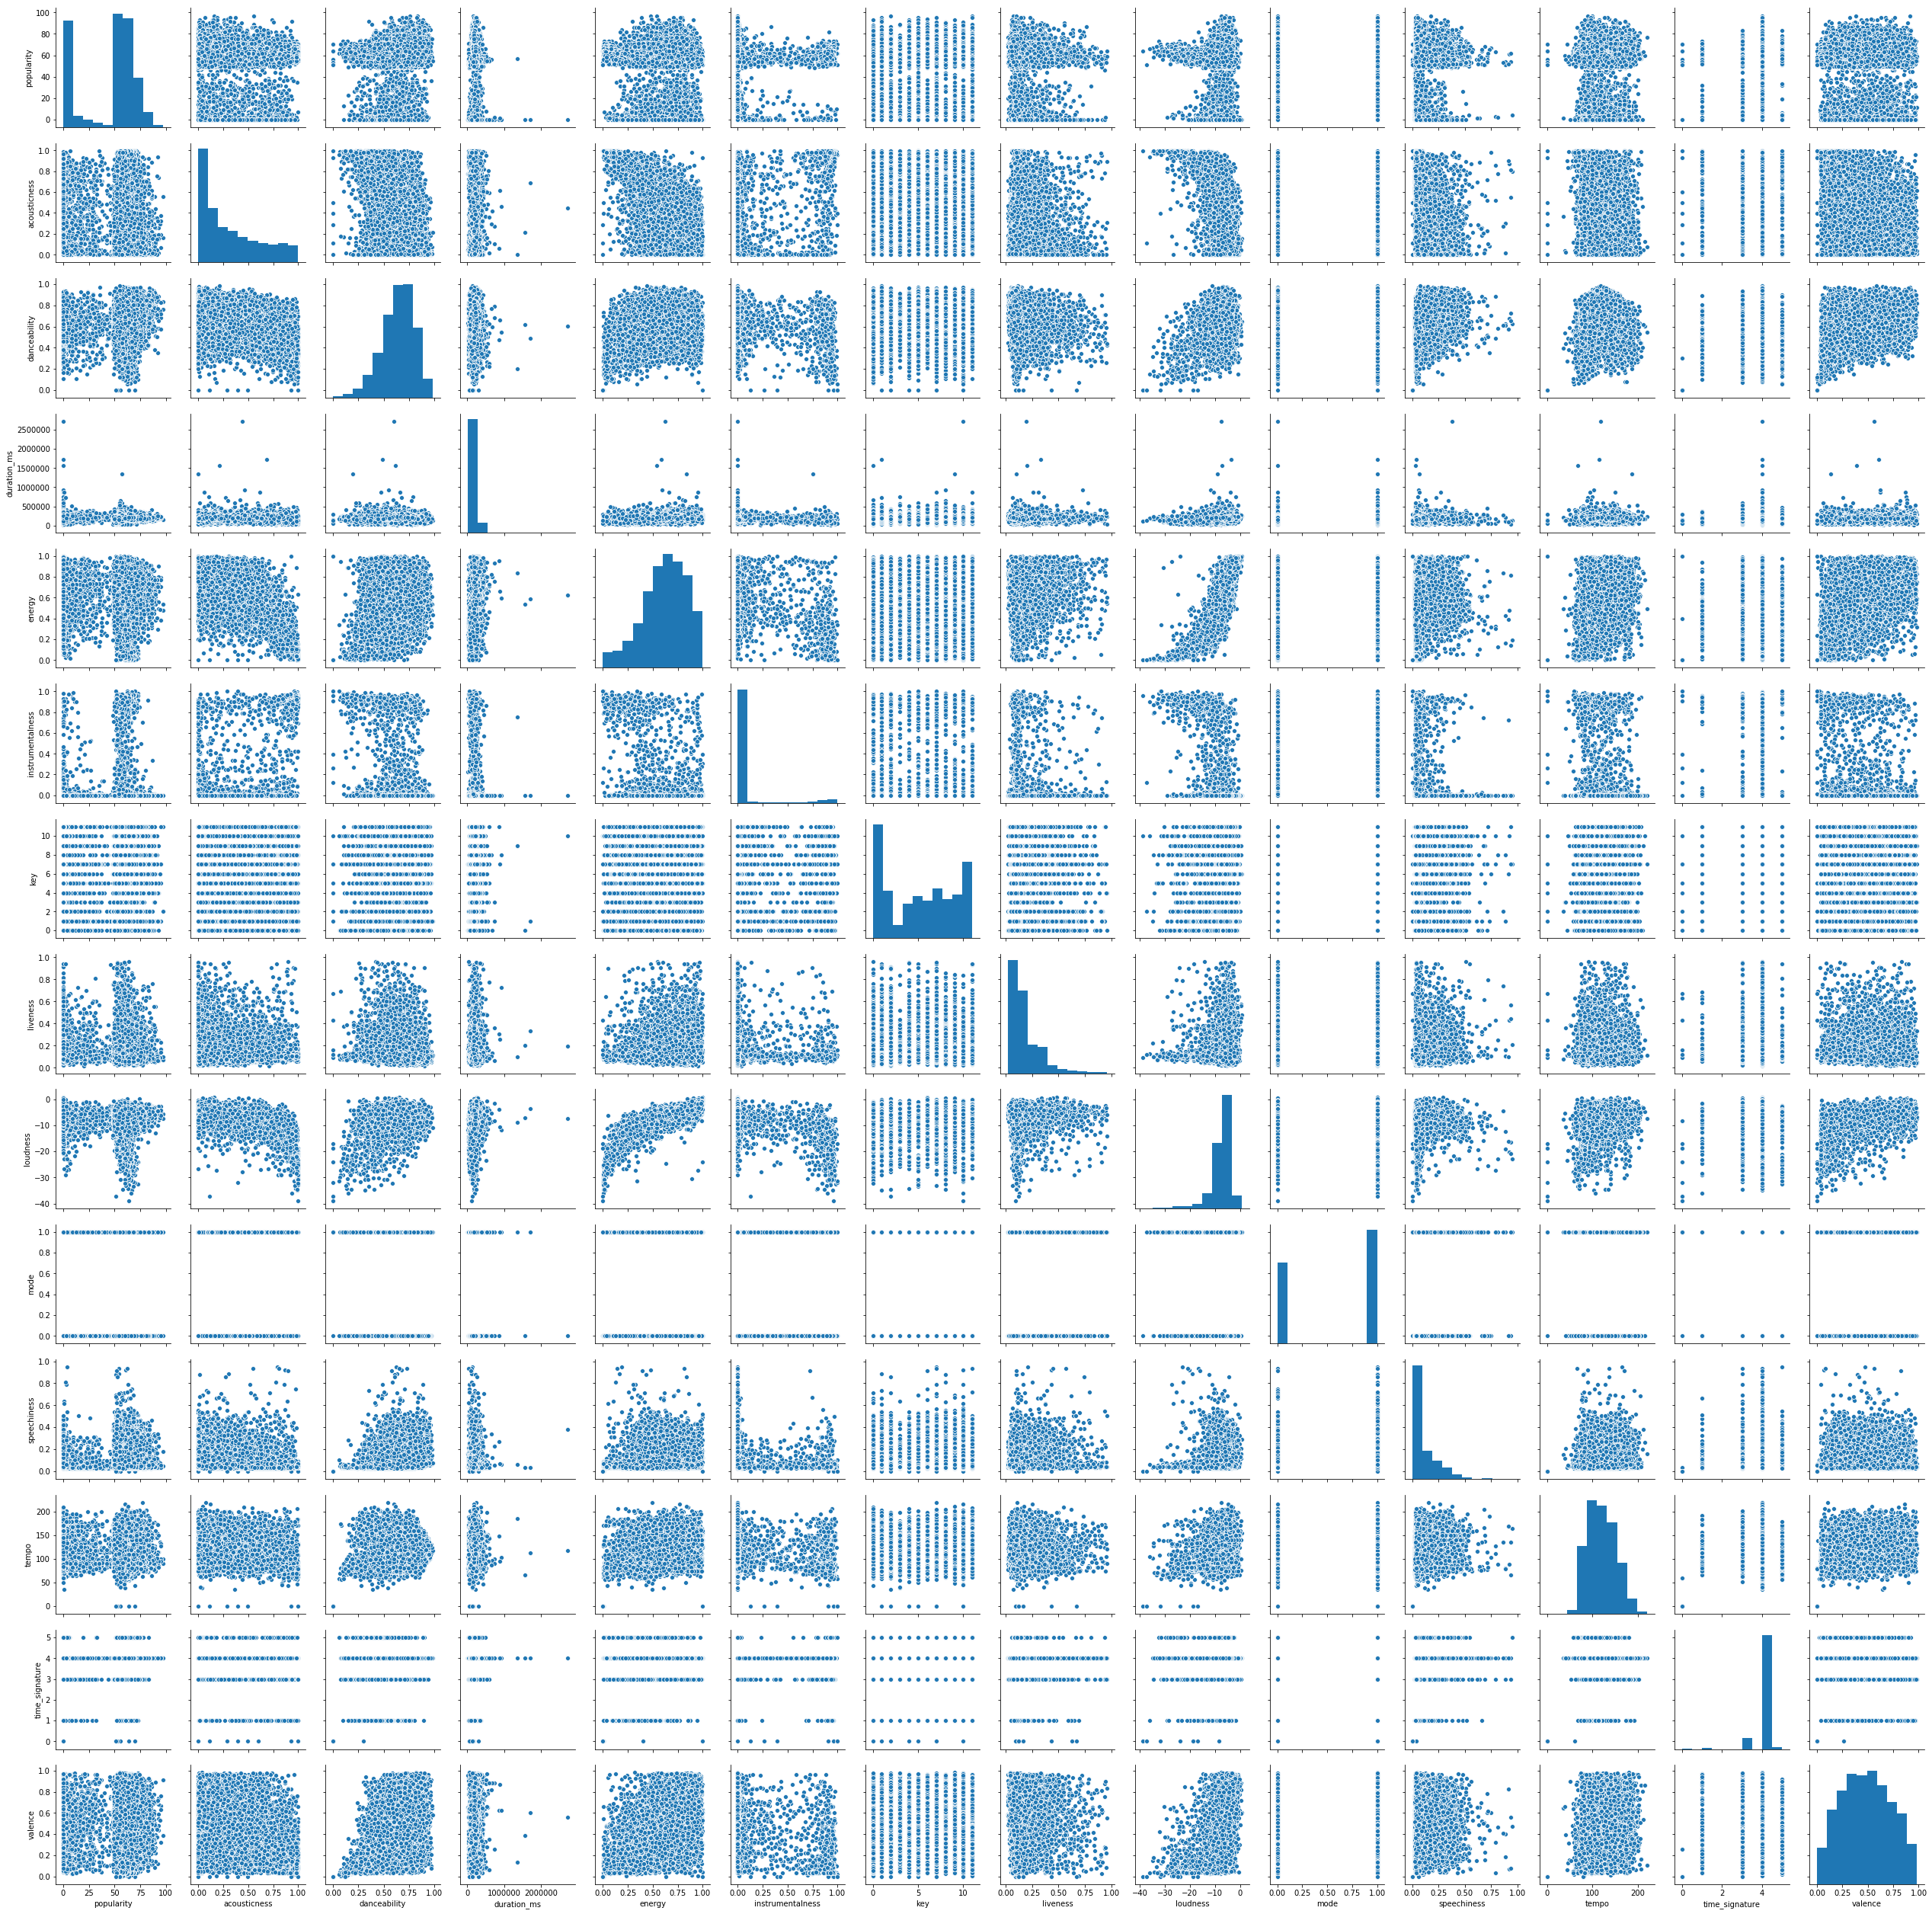

In [24]:
pairplot = sns.pairplot(df)
pairplot.savefig("pairplot.png")

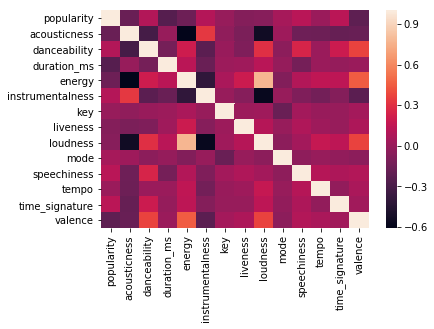

In [30]:
sns.heatmap(df.corr())

AxesSubplot(0.125,0.125;0.62x0.755)


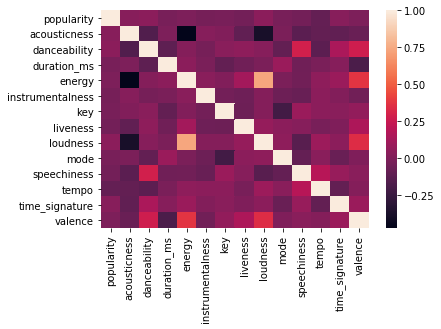

In [35]:
#Breaking down popularity
highly_p = df[df.popularity > 75]
med_p = df[(df.popularity > 60) & (df.popularity <= 75)]

#Print correlation of highly popular songs
print(sns.heatmap(highly_p.corr()))

AxesSubplot(0.125,0.125;0.62x0.755)


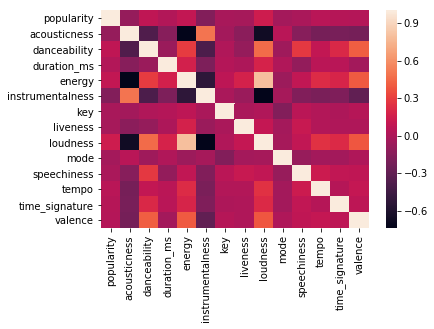

In [34]:
#print correlation heatmap of medium popular songs
print(sns.heatmap(med_p.corr()))

In [45]:
#sns.pairplot(highly_p, 
             #vars = ['popularity', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'valence'])

In [46]:
#sns.pairplot(med_p, 
             #vars = ['popularity', 'acousticness', 'danceability', 'energy', 'liveness', 'loudness', 'valence'])

There isn't a strong correlation with any variables to popularity, however, we can find strong correlation, even visible within seaborn, with energy.

There is a strong positive correlation with energy to loudness.
There is a strong negative correlation with energy to instrumentalness and acousticness.



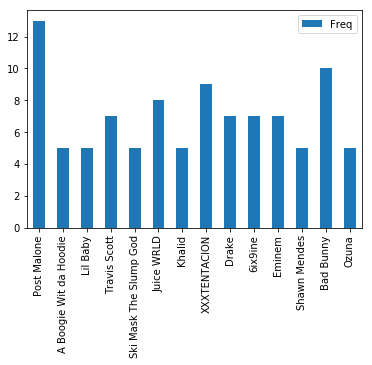

In [62]:
from collections import Counter

letter_counts = Counter(highly_p.artist_name)
artists = pd.DataFrame.from_dict(letter_counts, orient = 'index')
artists.columns = ['Freq']
artists.head()
artists_high = artists[artists.Freq > 4]
artists_high.head()

artists_high.plot(kind = 'bar')